<h1>Importing Dependecies</h1>

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline

<h1>Web-Scrapping</h1>

In [8]:
crawled_data = {}
crawled_data['table' + str(k)] = []
for h in range(0, 110000, 60):
    if(h == 0):
        clear_output(wait=True)
        print(h)
        url = "https://sofifa.com/?showCol%5B0%5D=pi&showCol%5B1%5D=ae&showCol%5B2%5D=oa&showCol%5B3%5D=pt&showCol%5B4%5D=bo&showCol%5B5%5D=bp&showCol%5B6%5D=vl&showCol%5B7%5D=wg&showCol%5B8%5D=ta&showCol%5B9%5D=ts&showCol%5B10%5D=to&showCol%5B11%5D=tp&showCol%5B12%5D=td&showCol%5B13%5D=tg&offset="+str(h)
        r = requests.get(url)
        soup = bs(r.content, "html5lib")
        for k, body in enumerate(soup.findAll('tbody')):
            crawled_data['table' + str(k)] = []
            for tr in body.find_all('tr'):
                tmp = tuple()
                th = tr.find('th')
                if th:
                    th = tr.find('th').text.strip()
                    tmp += (th,)
                for td in tr.find_all('td'):
                    tmp += (td.text.strip(),)
                crawled_data['table' + str(k)].append(tmp)
    else:
        clear_output(wait=True)
        print(h)
        url = "https://sofifa.com/?showCol%5B0%5D=pi&showCol%5B1%5D=ae&showCol%5B2%5D=oa&showCol%5B3%5D=pt&showCol%5B4%5D=bo&showCol%5B5%5D=bp&showCol%5B6%5D=vl&showCol%5B7%5D=wg&showCol%5B8%5D=ta&showCol%5B9%5D=ts&showCol%5B10%5D=to&showCol%5B11%5D=tp&showCol%5B12%5D=td&showCol%5B13%5D=tg&offset="+str(h)
        r = requests.get(url)
        soup = bs(r.content, "html5lib")
        for k, body in enumerate(soup.findAll('tbody')):
            #dados['table' + str(k)] = []
            for tr in body.find_all('tr'):
                tmp = tuple()
                th = tr.find('th')
                if th:
                    th = tr.find('th').text.strip()
                    tmp += (th,)
                for td in tr.find_all('td'):
                    tmp += (td.text.strip(),)
                crawled_data['table' + str(k)].append(tmp)

109980


In [9]:
_id = []
name = []
team = []
age = []
overall_rating = []
best_overall = []
position = []
market_value = []
wage = []
attacking_stats = []
movement_stats = []
power_stats = []
defence_stats = []
goalkeeper_stats = []
skillSets = []
total_potential = []


for key, value in crawled_data.items():
    for i in range(0,len(value)):
        # fetching id
        _id_sd = int(value[i][6])
        _id.append(_id_sd)
        
        # fetching name
        name_sd = str(value[i][1])
        name_fg = str(name_sd.splitlines()[0])
        name.append(name_fg)
            
        # fetching team
        team_sd = str(value[i][5])
        team_fg = str(team_sd.splitlines()[0])
        team.append(team_fg)
        
        # fetching age
        age.append(int(value[i][2]))
        
        # fetching overall rating
        overall_rating.append(int(value[i][3]))
        
        # fetching best_overall
        best_overall.append(int(value[i][7]))
        
        # fetching position
        position.append(str(value[i][8]))
        
        # fetching market_value
        market_value.append(str(value[i][9]))
        
        # fetching wage
        wage.append(str(value[i][10]))
        
        # fetching attacking_stats
        attacking_stats.append(int(value[i][11]))
        
        # fetching movement_stats
        movement_stats.append(value[i][13])
        
        # fetching power_stats
        power_stats.append(int(value[i][14]))
        
        # fetching defencs_stats
        defence_stats.append(int(value[i][15]))
        
        # fetching goalKeeper_stats
        goalkeeper_stats.append(int(value[i][16]))
        
        # fetching skill_sets
        skillSets.append(int(value[i][12]))
        
        # fetching total_potential
        total_potential.append(int(value[i][4]))


<h1>Data Preprocessing</h1>

In [10]:
dicti = {'ID':_id, 'Name':name, "Team":team, "Age":age, "Overall Rating":overall_rating, 'Best Overall':best_overall,
         'Position':position, 'Market value':market_value, 'Wage':wage, 'Attacking stats':attacking_stats,
         'Movement stats':movement_stats, 'Power stats':power_stats, 'Defence stats':defence_stats,
         'Goal-Keeper stats':goalkeeper_stats, 'Skill sets':skillSets, 'Total potential':total_potential}
df = pd.DataFrame(dicti)
df

,ID,Name,Team,Age,Overall Rating,Best Overall,Position,Market value,Wage,Attacking stats,Movement stats,Power stats,Defence stats,Goal-Keeper stats,Skill sets,Total potential
0,239085,E. Håland,Borussia Dortmund,18,79,78,ST,€20M,€32K,342,385,382,84,52,329,90
1,245541,G. Reyna,Borussia Dortmund,16,61,62,RW,€550K,€1K,254,371,263,67,56,310,85
2,251573,Renan Lodi,Atlético Madrid,21,79,79,LWB,€16.5M,€36K,346,413,372,225,55,373,87
3,233049,J. Sancho,Borussia Dortmund,19,85,85,RW,€55M,€66K,363,439,320,105,52,368,93
4,235212,A. Hakimi,Borussia Dortmund,20,81,81,RWB,€22M,€54K,348,423,373,228,46,355,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109919,203486,T. Hazard,Borussia Dortmund,26,83,82,CAM,€30.5M,€98K,358,423,354,142,37,405,84
109920,212188,T. Werner,RB Leipzig,23,86,85,ST,€57.5M,€92K,399,430,386,78,50,352,89
109921,234612,J. Ikoné,LOSC Lille,21,79,79,LW,€18M,€33K,314,428,306,104,52,378,86
109922,223848,S. Milinković-Savić,Lazio,24,85,84,CM,€50.5M,€73K,389,337,421,224,47,411,90


In [11]:
df.to_csv("raw_data.csv")

In [2]:
dff = pd.read_csv("raw_data.csv")
del(dff["Unnamed: 0"])
dff

,ID,Name,Team,Age,Overall Rating,Best Overall,Position,Market value,Wage,Attacking stats,Movement stats,Power stats,Defence stats,Goal-Keeper stats,Skill sets,Total potential
0,239085,E. Håland,Borussia Dortmund,18,79,78,ST,€20M,€32K,342,385,382,84,52,329,90
1,245541,G. Reyna,Borussia Dortmund,16,61,62,RW,€550K,€1K,254,371,263,67,56,310,85
2,251573,Renan Lodi,Atlético Madrid,21,79,79,LWB,€16.5M,€36K,346,413,372,225,55,373,87
3,233049,J. Sancho,Borussia Dortmund,19,85,85,RW,€55M,€66K,363,439,320,105,52,368,93
4,235212,A. Hakimi,Borussia Dortmund,20,81,81,RWB,€22M,€54K,348,423,373,228,46,355,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109919,203486,T. Hazard,Borussia Dortmund,26,83,82,CAM,€30.5M,€98K,358,423,354,142,37,405,84
109920,212188,T. Werner,RB Leipzig,23,86,85,ST,€57.5M,€92K,399,430,386,78,50,352,89
109921,234612,J. Ikoné,LOSC Lille,21,79,79,LW,€18M,€33K,314,428,306,104,52,378,86
109922,223848,S. Milinković-Savić,Lazio,24,85,84,CM,€50.5M,€73K,389,337,421,224,47,411,90


<h1>Data Cleaning</h1>

In [3]:
dff.isnull().any()

ID                   False
Name                 False
Team                 False
Age                  False
Overall Rating       False
Best Overall         False
Position             False
Market value         False
Wage                 False
Attacking stats      False
Movement stats       False
Power stats          False
Defence stats        False
Goal-Keeper stats    False
Skill sets           False
Total potential      False
dtype: bool

In [4]:
dff.groupby("Team").first()

,ID,Name,Age,Overall Rating,Best Overall,Position,Market value,Wage,Attacking stats,Movement stats,Power stats,Defence stats,Goal-Keeper stats,Skill sets,Total potential
Team,,,,,,,,,,,,,,,
1. FC Heidenheim 1846,231227,N. Dorsch,21,72,71,CDM,€4.2M,€7K,292,359,326,207,40,305,80
1. FC Kaiserslautern,236613,L. Grill,20,66,65,GK,€925K,€900,61,212,199,35,326,63,78
1. FC Köln,246666,N. Katterbach,18,67,67,LB,€1.5M,€2K,255,358,240,201,55,266,84
1. FC Magdeburg,234281,M. Kvesić,27,67,68,RW,€800K,€3K,299,391,331,60,45,363,67
1. FC Nürnberg,242000,K. Mavropanos,21,70,69,CB,€2.9M,€6K,217,260,286,216,51,207,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Évian Thonon Gaillard FC,210408,FIFA 14 I. Boccara,20,65,66,CB,€350K,€4K,249,324,316,193,56,300,78
Örebro SK,252733,N. Bergmark,17,54,55,CB,€130K,€500,194,274,267,154,47,192,68
Östers IF,190233,FIFA 14 M. Bergholtz,23,57,57,CDM,€100K,€2K,252,273,323,143,52,259,62


In [5]:
dff.dtypes.value_counts()

int64     11
object     5
dtype: int64

In [6]:
import re

In [7]:
pattern1 = "^[0-9].*$"
filter1 = dff["Team"].str.contains(pattern1)

In [8]:
dff = dff[~filter1]

In [9]:
dff

,ID,Name,Team,Age,Overall Rating,Best Overall,Position,Market value,Wage,Attacking stats,Movement stats,Power stats,Defence stats,Goal-Keeper stats,Skill sets,Total potential
0,239085,E. Håland,Borussia Dortmund,18,79,78,ST,€20M,€32K,342,385,382,84,52,329,90
1,245541,G. Reyna,Borussia Dortmund,16,61,62,RW,€550K,€1K,254,371,263,67,56,310,85
2,251573,Renan Lodi,Atlético Madrid,21,79,79,LWB,€16.5M,€36K,346,413,372,225,55,373,87
3,233049,J. Sancho,Borussia Dortmund,19,85,85,RW,€55M,€66K,363,439,320,105,52,368,93
4,235212,A. Hakimi,Borussia Dortmund,20,81,81,RWB,€22M,€54K,348,423,373,228,46,355,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109919,203486,T. Hazard,Borussia Dortmund,26,83,82,CAM,€30.5M,€98K,358,423,354,142,37,405,84
109920,212188,T. Werner,RB Leipzig,23,86,85,ST,€57.5M,€92K,399,430,386,78,50,352,89
109921,234612,J. Ikoné,LOSC Lille,21,79,79,LW,€18M,€33K,314,428,306,104,52,378,86
109922,223848,S. Milinković-Savić,Lazio,24,85,84,CM,€50.5M,€73K,389,337,421,224,47,411,90


In [10]:
pattern2 = "^FIFA [0-9].*$"
filter2 = dff["Name"].str.contains(pattern2)

In [11]:
dff = dff[~filter2]

In [12]:
dff

,ID,Name,Team,Age,Overall Rating,Best Overall,Position,Market value,Wage,Attacking stats,Movement stats,Power stats,Defence stats,Goal-Keeper stats,Skill sets,Total potential
0,239085,E. Håland,Borussia Dortmund,18,79,78,ST,€20M,€32K,342,385,382,84,52,329,90
1,245541,G. Reyna,Borussia Dortmund,16,61,62,RW,€550K,€1K,254,371,263,67,56,310,85
2,251573,Renan Lodi,Atlético Madrid,21,79,79,LWB,€16.5M,€36K,346,413,372,225,55,373,87
3,233049,J. Sancho,Borussia Dortmund,19,85,85,RW,€55M,€66K,363,439,320,105,52,368,93
4,235212,A. Hakimi,Borussia Dortmund,20,81,81,RWB,€22M,€54K,348,423,373,228,46,355,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109919,203486,T. Hazard,Borussia Dortmund,26,83,82,CAM,€30.5M,€98K,358,423,354,142,37,405,84
109920,212188,T. Werner,RB Leipzig,23,86,85,ST,€57.5M,€92K,399,430,386,78,50,352,89
109921,234612,J. Ikoné,LOSC Lille,21,79,79,LW,€18M,€33K,314,428,306,104,52,378,86
109922,223848,S. Milinković-Savić,Lazio,24,85,84,CM,€50.5M,€73K,389,337,421,224,47,411,90


In [13]:
dg_mv = []
for i in dff['Market value']:
    digi_mv = re.findall(r'\d+', i)
    if digi_mv[0].isdigit():
        if i[-1] == 'M':
            d_mv = int(digi_mv[0]) * 1000000
            dg_mv.append(d_mv)
        elif i[-1] == 'K':
            k_mv = int(digi_mv[0]) * 1000
            dg_mv.append(k_mv)
dg_mv

[20000000,
 550000,
 16000000,
 55000000,
 22000000,
 3000000,
 6000000,
 22000000,
 7000000,
 1000000,
 10000000,
 16000000,
 28000000,
 8000000,
 93000000,
 8000000,
 49000000,
 18000000,
 30000000,
 105000000,
 4000000,
 3000000,
 21000000,
 7000000,
 8000000,
 8000000,
 12000000,
 24000000,
 13000000,
 8000000,
 48000000,
 12000000,
 18000000,
 49000000,
 37000000,
 3000000,
 17000000,
 9000000,
 12000000,
 31000000,
 40000000,
 3000000,
 12000000,
 25000000,
 2000000,
 1000000,
 26000000,
 26000000,
 18000000,
 23000000,
 15000000,
 8000000,
 12000000,
 18000000,
 18000000,
 30000000,
 17000000,
 50000000,
 57000000,
 14000000,
 46000000,
 13000000,
 60000000,
 22000000,
 21000000,
 8000000,
 6000000,
 95000000,
 52000000,
 6000000,
 26000000,
 21000000,
 11000000,
 34000000,
 1000000,
 23000000,
 24000000,
 13000000,
 58000000,
 13000000,
 47000000,
 16000000,
 20000000,
 1000000,
 11000000,
 58000000,
 31000000,
 15000000,
 17000000,
 14000000,
 25000000,
 11000000,
 14000000,
 

In [14]:
dg_wage = []
for i in dff['Wage']:
    digi_wage = re.findall(r'\d+', i)
    if digi_wage[0].isdigit():
        if i[-1] == 'M':
            d_wage = int(digi_wage[0]) * 1000000
            dg_wage.append(d_wage)
        elif i[-1] == 'K':
            k_wage = int(digi_wage[0]) * 1000
            dg_wage.append(k_wage)
dg_wage

[32000,
 1000,
 36000,
 66000,
 54000,
 3000,
 17000,
 79000,
 30000,
 11000,
 48000,
 38000,
 6000,
 150000,
 4000,
 77000,
 8000,
 30000,
 290000,
 12000,
 5000,
 57000,
 16000,
 19000,
 6000,
 5000,
 37000,
 12000,
 23000,
 70000,
 68000,
 36000,
 150000,
 72000,
 5000,
 56000,
 34000,
 68000,
 74000,
 94000,
 1000,
 8000,
 90000,
 2000,
 9000,
 115000,
 86000,
 36000,
 43000,
 31000,
 2000,
 33000,
 54000,
 98000,
 28000,
 73000,
 92000,
 19000,
 93000,
 23000,
 210000,
 60000,
 65000,
 2000,
 1000,
 560000,
 42000,
 17000,
 59000,
 30000,
 31000,
 28000,
 4000,
 81000,
 79000,
 57000,
 410000,
 69000,
 140000,
 43000,
 49000,
 4000,
 7000,
 135000,
 105000,
 56000,
 19000,
 23000,
 60000,
 22000,
 38000,
 43000,
 1000,
 33000,
 110000,
 150000,
 76000,
 210000,
 89000,
 1000,
 29000,
 16000,
 6000,
 16000,
 90000,
 96000,
 14000,
 59000,
 165000,
 76000,
 18000,
 5000,
 175000,
 17000,
 44000,
 33000,
 77000,
 195000,
 49000,
 6000,
 2000,
 240000,
 10000,
 76000,
 46000,
 240000,

<h1>Data Analysing</h1>

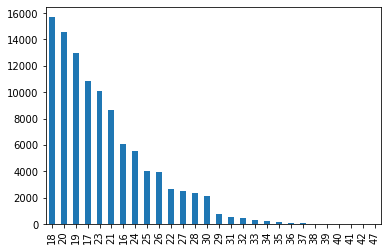

In [15]:
dff['Age'].value_counts().plot(kind = 'bar')

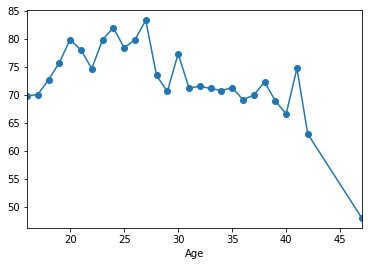

In [16]:
dff.groupby("Age")["Overall Rating"].mean().plot(marker = "o")

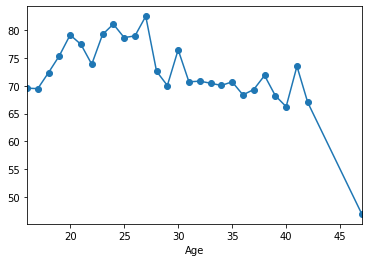

In [17]:
dff.groupby("Age")["Best Overall"].mean().plot(marker = "o")

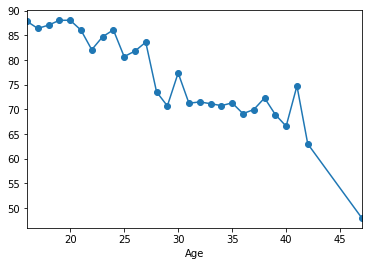

In [18]:
dff.groupby("Age")["Total potential"].mean().plot(marker = "o")

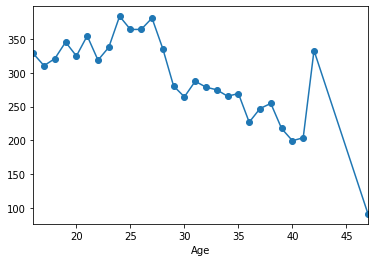

In [19]:
dff.groupby("Age")["Skill sets"].mean().plot(marker = "o")

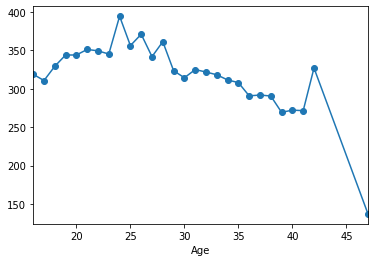

In [20]:
dff.groupby("Age")["Power stats"].mean().plot(marker = "o")

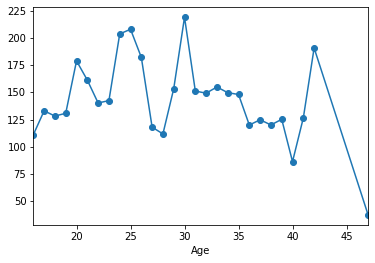

In [21]:
dff.groupby("Age")["Defence stats"].mean().plot(marker = "o")

In [22]:
dff.describe()

,ID,Age,Overall Rating,Best Overall,Attacking stats,Movement stats,Power stats,Defence stats,Goal-Keeper stats,Skill sets,Total potential
count,104731.000000,104731.000000,104731.000000,104731.000000,104731.000000,104731.000000,104731.000000,104731.000000,104731.000000,104731.000000,104731.000000
mean,230936.171917,20.935988,76.117367,75.564522,320.433816,376.348598,340.958140,150.437234,53.970572,334.310176,85.376765
std,19047.115190,3.777310,6.980331,6.873837,55.335973,46.083139,43.466531,59.706911,32.919183,61.098555,6.230943
min,41.000000,16.000000,46.000000,47.000000,42.000000,113.000000,133.000000,21.000000,5.000000,43.000000,48.000000
25%,213956.000000,18.000000,72.000000,72.000000,292.000000,353.000000,313.000000,99.000000,47.000000,302.000000,84.000000
50%,236772.000000,20.000000,77.000000,76.000000,329.000000,383.000000,343.000000,140.000000,50.000000,347.000000,87.000000
75%,245371.000000,23.000000,81.000000,80.000000,354.000000,410.000000,374.000000,212.000000,54.000000,376.000000,88.000000
max,255660.000000,47.000000,94.000000,94.000000,437.000000,465.000000,446.000000,272.000000,439.000000,472.000000,95.000000


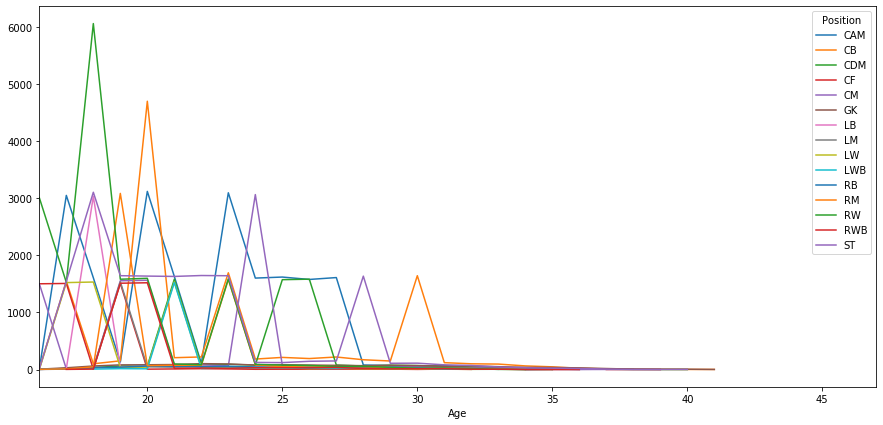

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
dff.groupby(["Age","Position"])["Position"].count().unstack().plot(ax=ax)

In [24]:
cor_matrix = dff.corr()

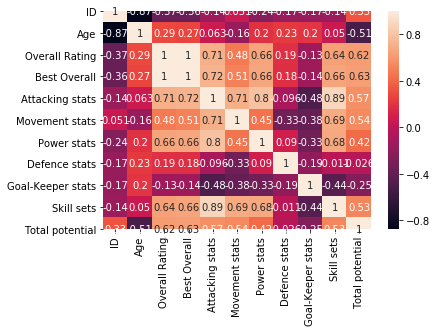

In [25]:
sn.heatmap(cor_matrix, annot=True)

<h2>Abbreviations</h2>

In [26]:
dff["Position"].unique()

array(['ST', 'RW', 'LWB', 'RWB', 'LB', 'CF', 'CDM', 'CB', 'CAM', 'RM',
       'CM', 'LW', 'LM', 'RB', 'GK'], dtype=object)

ST -> Striker<br>
RW -> Right winger (a more attacking option than a right midfielder)<br>
LWB -> Left Wing Back<br>
RWB -> Right Wing Back<br>
LB -> Left back<br>
CF -> Center forward<br>
CDM -> Central defensive midfielder<br>
CB -> Centre back<br>
CAM -> Central attacking midfielder<br>
RM -> Right midfielder<br>
CM -> Centre midfielder<br>
LW -> Left winger (typically more attack-minded than a left midfielder)<br>
LM -> Left midfielder<br>
RB -> Right back<br>
GK -> Goalkeeper<br>

In [29]:
dff.nlargest(5, columns='Best Overall')

,ID,Name,Team,Age,Overall Rating,Best Overall,Position,Market value,Wage,Attacking stats,Movement stats,Power stats,Defence stats,Goal-Keeper stats,Skill sets,Total potential
67,158023,L. Messi,FC Barcelona,32,94,94,CAM,€95.5M,€560K,433,458,391,96,54,472,94
19,190871,Neymar Jr,Paris Saint-Germain,27,92,91,CAM,€105.5M,€290K,410,455,355,94,59,447,92
78,20801,Cristiano Ronaldo,Juventus,34,93,91,ST,€58.5M,€410K,437,433,446,84,58,415,93
11919,190871,Neymar Jr,Paris Saint-Germain,27,92,91,CAM,€105.5M,€290K,410,455,355,94,59,447,92
19943,190871,Neymar Jr,Paris Saint-Germain,27,92,91,CAM,€105.5M,€290K,410,455,355,94,59,447,92


In [30]:
dff.nsmallest(5, columns='Best Overall')

,ID,Name,Team,Age,Overall Rating,Best Overall,Position,Market value,Wage,Attacking stats,Movement stats,Power stats,Defence stats,Goal-Keeper stats,Skill sets,Total potential
2017,53985,S. Royce,Gillingham,47,48,47,GK,€3K,€700,76,145,137,37,237,91,48
4671,252757,R. McKinley,Derry City,17,48,47,CM,€60K,€500,197,292,245,121,48,205,74
5666,252840,G. Bucci,Lincoln City,16,48,47,CB,€50K,€500,153,286,227,144,53,155,66
5951,233667,Shan Huanhuan,Dalian YiFang FC,20,48,47,ST,€70K,€2K,187,254,223,83,51,202,62
6461,253979,T. Egbri,Southend United,18,48,47,RM,€70K,€500,193,309,226,89,56,224,69


<h1>Machine Learning</h1>

In [151]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dff, test_size = 0.30, random_state = 99)
xtrain = train[['Goal-Keeper stats']]
ytrain = train[['Best Overall']]
 
xtest = test[['Goal-Keeper stats']]
ytest = test[['Best Overall']]


In [152]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
y_pred = regr.predict(xtest)

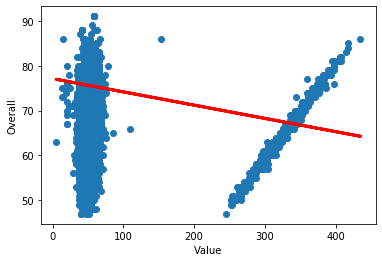

In [158]:
plt.scatter(xtest, ytest)
plt.plot(xtest, y_pred,  color='red', linewidth=3)
plt.xlabel("Value")
plt.ylabel("Overall")
plt.show()

In [32]:
dff[dff["ID"] == 20801]

,ID,Name,Team,Age,Overall Rating,Best Overall,Position,Market value,Wage,Attacking stats,Movement stats,Power stats,Defence stats,Goal-Keeper stats,Skill sets,Total potential
78,20801,Cristiano Ronaldo,Juventus,34,93,91,ST,€58.5M,€410K,437,433,446,84,58,415,93
